In [1]:
import numpy as np
import pandas as pd
import cv2
import os
import time 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import random


In [2]:
#from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.cm as cm

In [3]:
train_path = "spliting_dataset/train"
folder_train = os.listdir(train_path)
distribution_of_train_data = {}
images_train = {}
for i in range(len(folder_train)):
    image_array=[]
    dir = os.path.join(train_path,folder_train[i])
    for file in os.listdir(dir):
        img = cv2.imread(os.path.join(dir,file),0)
#0 in the imread read image in greyscale mode
        image_array.append(img)  
    images_train[folder_train[i]] = image_array
    distribution_of_train_data[folder_train[i]] = len(os.listdir(dir))

In [4]:
test_path = "spliting_dataset/val"
folder_test = os.listdir(train_path)
distribution_of_test_data = {}
images_test = {}
for i in range(len(folder_test)):
    image_array=[]
    dir = os.path.join(test_path,folder_test[i])
    for file in os.listdir(dir):
        img = cv2.imread(os.path.join(dir,file),0)
#0 in the imread read image in greyscale mode
        image_array.append(img)  
    images_test[folder_test[i]] = image_array
    distribution_of_test_data[folder_test[i]] = len(os.listdir(dir))

In [5]:
distribution_of_train_data

{'Cheetah': 50, 'Jaguar': 50, 'Leopard': 50, 'Lion': 50, 'Tiger': 50}

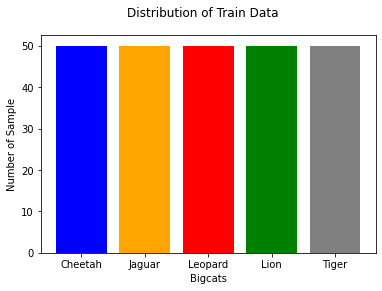

In [6]:
names = list(distribution_of_train_data.keys())
values = list(distribution_of_train_data.values())
plt.bar(range(len(distribution_of_train_data)), values, tick_label=names, color = ["blue","orange","red","green","grey"])
plt.ylabel('Number of Sample')
plt.suptitle('Distribution of Train Data')
plt.xlabel('Bigcats');
plt.rc('axes', labelsize=15)
plt.rc('figure', titlesize=20)
plt.show()

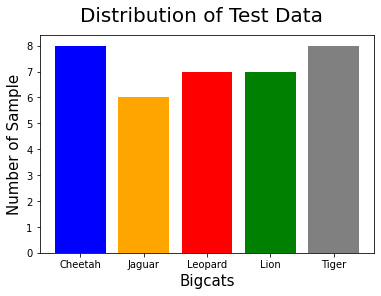

In [7]:
names = list(distribution_of_test_data.keys())
values = list(distribution_of_test_data.values())
plt.bar(range(len(distribution_of_test_data)), values, tick_label=names, color = ["blue","orange","red","green","grey"])
plt.ylabel('Number of Sample')
plt.suptitle('Distribution of Test Data')
plt.xlabel('Bigcats');
plt.rc('axes', labelsize=15)
plt.rc('figure', titlesize=20)
plt.show()

## Applying SIFT

In [8]:
def SIFT_detector(images):
    sift_vector = {}
    descriptor = []
    sift = cv2.SIFT_create()
    for category,img_list in images.items():
        features = []
        for img in img_list:
            kp,des = sift.detectAndCompute(img,None)
            descriptor.extend(des)
            features.append(des)
        sift_vector[category] = features
    return [descriptor,sift_vector]

In [9]:
sift_train = SIFT_detector(images_train)
descriptors_train = sift_train[0]
bag_of_visual_train = sift_train[1]
len(bag_of_visual_train["Cheetah"])

50

In [10]:
sift_test = SIFT_detector(images_test)
bag_of_visual_test = sift_test[1]

### Applying KMeans Clustering

In [11]:
def kmeans(k,descriptors):
    cluster = KMeans(n_clusters = k,n_init =10)
    cluster.fit(descriptors)
    visual_words = cluster.cluster_centers_
    return visual_words

In [12]:
visual_words_150 = kmeans(150,descriptors_train)
visual_words_120 = kmeans(120,descriptors_train)
visual_words_180 = kmeans(180,descriptors_train)

## Creating Histograms

In [13]:
def images_class(features,centers):
    dict_features = {}
    for category,img_list in features.items():
        img_class = []
        for img in img_list:
            histogram = np.zeros((1,len(centers)))
            for each_feature in img:
                diff = np.tile(each_feature, (len(centers), 1)) - centers
                dist = pow(((pow(diff, 2)).sum(axis = 1)), 0.5)
                idx_dist = dist.argsort()
                idx = idx_dist[0]
                #print(idx)
                #break
                histogram[0][idx] += 1
            img_class.append(histogram)
        dict_features[category]= img_class
    return dict_features

In [14]:
bag_of_visual_words_150 = images_class(bag_of_visual_train,visual_words_150)
bag_of_visual_words_180 = images_class(bag_of_visual_train,visual_words_180)
bag_of_visual_words_120 = images_class(bag_of_visual_train,visual_words_120)

In [15]:
bag_of_visual_words_test_150 = images_class(bag_of_visual_test,visual_words_150)
bag_of_visual_words_test_180 = images_class(bag_of_visual_test,visual_words_180)
bag_of_visual_words_test_120 = images_class(bag_of_visual_test,visual_words_120)

In [17]:
print(len(bag_of_visual_words_test_150["Cheetah"]))
print(bag_of_visual_words_150)

8
{'Cheetah': [array([[15., 24., 10., 19., 22., 14., 26., 15., 16., 14., 20., 22., 20.,
        28., 17., 16., 20., 16., 10., 18., 24., 23.,  8., 13., 17., 24.,
        19., 18., 18., 13., 33., 10., 16., 12.,  9., 19., 23., 24., 12.,
        19., 23., 14., 10., 15., 13., 17., 17.,  7., 16., 16., 16., 20.,
        25., 18., 22., 20.,  3., 27., 16., 35., 26., 16., 21.,  9.,  0.,
         9.,  8., 24., 13., 32., 13., 25., 30., 11., 10., 35.,  8.,  7.,
        23.,  8., 20., 22., 15., 12., 30.,  7., 18., 18., 12., 11., 18.,
        26., 15., 14., 14., 28., 33., 16., 19., 39., 16., 13., 15., 20.,
        15., 15., 23., 22., 19., 22., 10., 23., 21.,  9., 14., 30., 19.,
        13., 17., 18., 23.,  9., 14., 16., 18., 12., 20., 15., 10., 15.,
        24., 16., 17., 11., 19., 11.,  5., 20., 18., 22.,  8., 17.,  2.,
        21.,  8., 22., 11., 22., 14., 36.]]), array([[ 2., 11., 16.,  6., 13.,  7., 26.,  8., 11.,  8.,  9., 20., 31.,
         7., 10.,  6., 13., 17.,  9.,  8.,  5.,  8.,  6., 11., 

## Preparing Dataset for clustering using 150 clusters in k_means

In [18]:
labels_150 = []
train_150=[]
for category,img_list in bag_of_visual_words_150.items():
    for img in img_list:
        train_150.append(img)
        labels_150.append(category)  
print(len(labels_150))
print(len(train_150))

250
250


In [19]:
train_150 = np.squeeze(train_150, axis = 1) 
print(train_150.shape)
train_150 = pd.DataFrame(train_150)
print(train_150)

(250, 150)
      0     1     2     3     4     5     6     7     8     9    ...   140  \
0    15.0  24.0  10.0  19.0  22.0  14.0  26.0  15.0  16.0  14.0  ...   8.0   
1     2.0  11.0  16.0   6.0  13.0   7.0  26.0   8.0  11.0   8.0  ...   9.0   
2    19.0   6.0   5.0   1.0   2.0   2.0   1.0   7.0  18.0   4.0  ...   7.0   
3    24.0  25.0  22.0  17.0  11.0  13.0   8.0  22.0  25.0  16.0  ...  26.0   
4    18.0  27.0  11.0  31.0  21.0  13.0  38.0  18.0  16.0  18.0  ...  13.0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
245   1.0  21.0  17.0  45.0  33.0  19.0  34.0  10.0  15.0  12.0  ...  15.0   
246   7.0  21.0  12.0  10.0  11.0  10.0  14.0  24.0  11.0  11.0  ...   6.0   
247  19.0  18.0  14.0  15.0  15.0   8.0   7.0  15.0  21.0  20.0  ...  23.0   
248  27.0  10.0  14.0   5.0   6.0  11.0  12.0  10.0  21.0  22.0  ...  18.0   
249  15.0   2.0  13.0   9.0   4.0   2.0   1.0   1.0   7.0   9.0  ...   7.0   

      141   142   143   144   145   146   147   148 

In [20]:
## Since each descriptor value is assigned to one of the cluster of the Kmeans so it values will lie between 1 to 150. Therefore we don't need to standardize the dataset 

In [21]:
labelencoder = LabelEncoder()
labels_150 =pd.DataFrame(labels_150)
labels_150 = labelencoder.fit_transform(labels_150[0])
labels_150

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4])

In [22]:
## Preparing Dataset for clustering using 120 clusters in k_means

In [23]:
labels_120 = []
train_120=[]
for category,img_list in bag_of_visual_words_120.items():
    for img in img_list:
        train_120.append(img)
        labels_120.append(category)  
print(len(labels_120))
print(len(train_120))

250
250


In [24]:
train_120 = np.squeeze(train_120, axis = 1) 
print(train_120.shape)
train_120 = pd.DataFrame(train_120)
print(train_120)

(250, 120)
      0     1     2     3     4     5     6     7     8     9    ...   110  \
0    14.0  23.0  20.0  19.0  45.0  12.0  23.0  21.0  20.0  32.0  ...  25.0   
1     6.0  15.0  11.0  13.0  36.0  21.0   5.0  32.0  23.0   1.0  ...  39.0   
2     5.0  16.0   9.0   9.0   4.0  25.0  32.0   6.0  13.0  20.0  ...   1.0   
3    23.0  37.0  28.0  35.0  18.0  20.0   5.0  30.0  22.0  33.0  ...  13.0   
4    18.0  22.0  38.0  28.0  51.0  15.0  36.0  28.0  24.0  48.0  ...  23.0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
245  31.0  17.0  15.0  15.0  42.0  22.0   4.0  27.0  28.0  11.0  ...  30.0   
246   9.0  24.0  16.0   6.0  21.0  14.0   7.0  19.0  29.0   9.0  ...  26.0   
247  26.0  28.0  16.0  29.0   6.0  32.0  26.0  17.0  25.0  20.0  ...  17.0   
248  16.0  19.0  14.0  27.0  15.0  21.0  28.0   8.0  16.0   8.0  ...  16.0   
249   4.0   8.0   6.0   9.0   2.0  18.0  15.0  10.0   3.0   4.0  ...   8.0   

      111   112   113   114   115   116   117   118 

In [25]:
labelencoder = LabelEncoder()
labels_120 =pd.DataFrame(labels_120)
labels_120 = labelencoder.fit_transform(labels_120[0])
labels_120

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4])

In [26]:
## Preparing Dataset for clustering using 180 clusters in k_means

In [27]:
labels_180 = []
train_180=[]
for category,img_list in bag_of_visual_words_180.items():
    for img in img_list:
        train_180.append(img)
        labels_180.append(category)  
print(len(labels_180))
print(len(train_180))

250
250


In [28]:
train_180 = np.squeeze(train_180, axis = 1) 
print(train_180.shape)
train_120 = pd.DataFrame(train_180)
print(train_180)

(250, 180)
[[20. 22. 19. ...  9.  5.  7.]
 [10. 28. 16. ... 10.  7. 11.]
 [ 3.  0.  2. ... 10.  0.  2.]
 ...
 [10.  2. 11. ... 20. 12. 22.]
 [ 7.  1. 11. ... 13. 11. 25.]
 [ 5.  0.  3. ... 12.  5.  7.]]


In [29]:
labelencoder = LabelEncoder()
labels_180 =pd.DataFrame(labels_180)
labels_180 = labelencoder.fit_transform(labels_180[0])
labels_180

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4])

## Applying K-Means clustering on different clusters

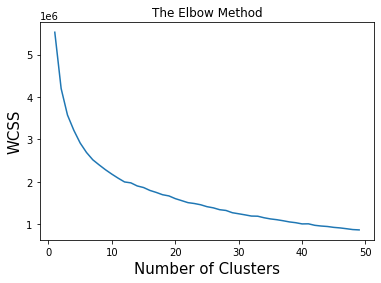

In [30]:
wcss = []
for i in range(1,50):
    kmeans=KMeans(n_clusters=i, init ="k-means++", random_state=0)
    kmeans.fit(train_150)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,50),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [31]:
clusterer = KMeans(n_clusters=10, random_state=10)
cluster_labels = clusterer.fit_predict(train_150)
print(cluster_labels)

[4 2 0 4 4 5 4 2 4 5 7 5 2 4 4 0 0 2 0 0 0 5 2 4 5 4 0 0 4 4 4 5 2 4 2 7 5
 5 0 0 3 2 5 4 0 3 0 0 9 0 0 2 2 2 0 4 0 3 0 2 2 4 8 2 0 2 2 8 3 2 2 2 2 2
 0 0 3 0 3 2 2 4 2 2 2 2 3 6 0 8 8 2 0 2 0 8 0 8 0 4 7 2 2 0 0 0 2 2 8 2 0
 0 0 2 2 6 0 0 6 0 2 0 0 2 0 6 4 5 2 2 4 7 2 2 0 0 2 2 8 0 3 2 2 0 2 0 0 0
 7 0 6 6 9 6 6 6 0 6 3 0 1 6 0 1 9 0 1 0 0 0 6 9 1 6 9 1 0 0 0 6 0 0 0 6 6
 6 9 9 0 0 6 6 4 1 9 3 6 0 6 6 9 6 3 6 3 6 9 6 6 3 6 6 6 6 3 9 6 6 6 3 3 3
 3 3 6 6 0 3 6 6 0 3 3 6 9 6 6 9 6 3 3 0 6 6 0 9 6 6 6 6]


In [32]:
print(f'Silhouette Score(n=10): {silhouette_score(train_150, cluster_labels)}')

Silhouette Score(n=10): 0.14665687077797523


In [33]:
range_n_clusters = range(2, 20)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(train_150)
    print(f'Silhouette Score(n={n_clusters}): {silhouette_score(train_150, cluster_labels)}')

Silhouette Score(n=2): 0.30238081905373
Silhouette Score(n=3): 0.23276909309373509
Silhouette Score(n=4): 0.2392984489637538
Silhouette Score(n=5): 0.224268071729293
Silhouette Score(n=6): 0.17466906000159538
Silhouette Score(n=7): 0.20166449588408233
Silhouette Score(n=8): 0.16571285620832754
Silhouette Score(n=9): 0.1495948005332756
Silhouette Score(n=10): 0.14665687077797523
Silhouette Score(n=11): 0.1374341905214299
Silhouette Score(n=12): 0.12970601898522455
Silhouette Score(n=13): 0.14519067537470756
Silhouette Score(n=14): 0.11966564686635515
Silhouette Score(n=15): 0.13188797397179527
Silhouette Score(n=16): 0.1333270662542186
Silhouette Score(n=17): 0.13173476915836888
Silhouette Score(n=18): 0.12890593902730832
Silhouette Score(n=19): 0.13442863972988975


In [34]:
## Applying K-Means clustering on 120 Clusters

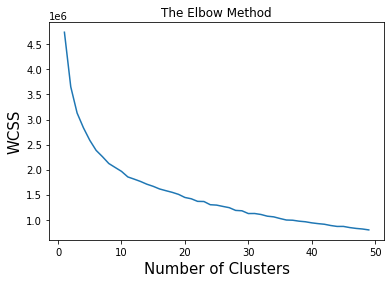

In [35]:
wcss = []
for i in range(1,50):
    kmeans=KMeans(n_clusters=i, init ="k-means++", random_state=0)
    kmeans.fit(train_120)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,50),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [36]:
clusterer = KMeans(n_clusters=10, random_state=10)
cluster_labels = clusterer.fit_predict(train_120)
print(cluster_labels)

[7 7 8 2 2 7 2 1 7 0 0 0 3 2 2 1 8 7 8 8 1 7 3 7 7 7 1 1 2 2 0 0 1 2 7 0 7
 0 8 8 4 7 0 7 1 3 1 8 5 8 8 7 7 1 8 2 8 4 1 7 1 2 2 1 8 7 7 2 4 1 7 7 1 1
 8 8 4 8 3 7 1 2 1 7 1 1 4 3 8 2 2 7 8 1 8 2 8 9 1 2 0 7 1 8 1 8 1 7 2 1 8
 1 8 1 1 8 8 8 3 8 1 1 1 1 1 3 2 7 3 7 2 0 7 7 1 1 1 1 2 8 3 1 1 1 1 8 8 1
 0 8 8 3 5 3 8 8 8 3 3 8 6 3 8 6 5 8 6 8 8 8 3 5 6 3 5 6 8 8 8 3 8 8 3 3 3
 3 5 5 8 8 8 8 2 6 5 3 3 8 3 3 5 3 4 3 4 3 5 3 8 4 3 8 3 8 4 5 3 3 8 4 4 4
 4 3 3 4 8 4 3 3 8 4 4 5 5 8 8 5 8 4 4 8 8 3 8 5 3 3 3 8]


In [37]:
print(f'Silhouette Score(n=10): {silhouette_score(train_120, cluster_labels)}')

Silhouette Score(n=10): 0.13432205579681095


In [38]:
range_n_clusters = range(2, 20)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(train_120)
    print(f'Silhouette Score(n={n_clusters}): {silhouette_score(train_120, cluster_labels)}')

Silhouette Score(n=2): 0.29801110058432073
Silhouette Score(n=3): 0.22693553966945407
Silhouette Score(n=4): 0.22850503126136182
Silhouette Score(n=5): 0.173747171612787
Silhouette Score(n=6): 0.18232993405879283
Silhouette Score(n=7): 0.19338906191467367
Silhouette Score(n=8): 0.13432253221594073
Silhouette Score(n=9): 0.13268283002259912
Silhouette Score(n=10): 0.13432205579681095
Silhouette Score(n=11): 0.12127708890876182
Silhouette Score(n=12): 0.14040234518760064
Silhouette Score(n=13): 0.12668859431467175
Silhouette Score(n=14): 0.11469579188080911
Silhouette Score(n=15): 0.14519512512378996
Silhouette Score(n=16): 0.10476604809872614
Silhouette Score(n=17): 0.10948526331904736
Silhouette Score(n=18): 0.11094537060587421
Silhouette Score(n=19): 0.13904832417900706


In [39]:
## Applying K-Means clustering on 150 Clusters

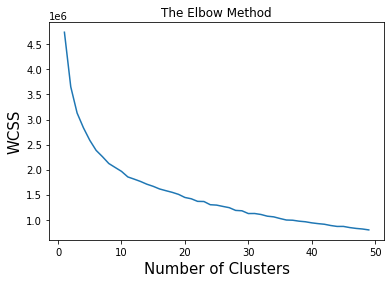

In [40]:
wcss = []
for i in range(1,50):
    kmeans=KMeans(n_clusters=i, init ="k-means++", random_state=0)
    kmeans.fit(train_180)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,50),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [41]:
clusterer = KMeans(n_clusters=10, random_state=10)
cluster_labels = clusterer.fit_predict(train_180)
print(cluster_labels)

[7 7 8 2 2 7 2 1 7 0 0 0 3 2 2 1 8 7 8 8 1 7 3 7 7 7 1 1 2 2 0 0 1 2 7 0 7
 0 8 8 4 7 0 7 1 3 1 8 5 8 8 7 7 1 8 2 8 4 1 7 1 2 2 1 8 7 7 2 4 1 7 7 1 1
 8 8 4 8 3 7 1 2 1 7 1 1 4 3 8 2 2 7 8 1 8 2 8 9 1 2 0 7 1 8 1 8 1 7 2 1 8
 1 8 1 1 8 8 8 3 8 1 1 1 1 1 3 2 7 3 7 2 0 7 7 1 1 1 1 2 8 3 1 1 1 1 8 8 1
 0 8 8 3 5 3 8 8 8 3 3 8 6 3 8 6 5 8 6 8 8 8 3 5 6 3 5 6 8 8 8 3 8 8 3 3 3
 3 5 5 8 8 8 8 2 6 5 3 3 8 3 3 5 3 4 3 4 3 5 3 8 4 3 8 3 8 4 5 3 3 8 4 4 4
 4 3 3 4 8 4 3 3 8 4 4 5 5 8 8 5 8 4 4 8 8 3 8 5 3 3 3 8]


In [42]:
print(f'Silhouette Score(n=10): {silhouette_score(train_180, cluster_labels)}')

Silhouette Score(n=10): 0.13432205579681095


In [43]:
range_n_clusters = range(2, 20)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(train_180)
    print(f'Silhouette Score(n={n_clusters}): {silhouette_score(train_180, cluster_labels)}')

Silhouette Score(n=2): 0.29801110058432073
Silhouette Score(n=3): 0.22693553966945407
Silhouette Score(n=4): 0.22850503126136182
Silhouette Score(n=5): 0.173747171612787
Silhouette Score(n=6): 0.18232993405879283
Silhouette Score(n=7): 0.19338906191467367
Silhouette Score(n=8): 0.13432253221594073
Silhouette Score(n=9): 0.13268283002259912
Silhouette Score(n=10): 0.13432205579681095
Silhouette Score(n=11): 0.12127708890876182
Silhouette Score(n=12): 0.14040234518760064
Silhouette Score(n=13): 0.12668859431467175
Silhouette Score(n=14): 0.11469579188080911
Silhouette Score(n=15): 0.14519512512378996
Silhouette Score(n=16): 0.10476604809872614
Silhouette Score(n=17): 0.10948526331904736
Silhouette Score(n=18): 0.11094537060587421
Silhouette Score(n=19): 0.13904832417900706
